<a href="https://colab.research.google.com/github/Fr0stb1t3/DataScience-Assignment/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Part A
#Heirarical Clustering


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import files
f = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
dataset = pd.read_csv('Mall_Customers.csv')


In [9]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = dataset.iloc[:,[3,4]].values

In [7]:
import scipy.cluster.hierarchy as sch

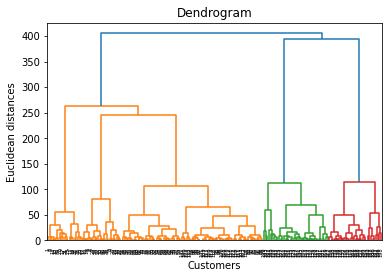

In [8]:
dendrogram = sch.dendrogram(sch.linkage(X,method = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Fitting hierarchical clustering to the Mall_Customes dataset
# There are two algorithms for hierarchical clustering: Agglomerative Hierarchical Clustering and 
# Divisive Hierarchical Clustering. We choose Euclidean distance and ward method for our 
# algorithm class

In [10]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage ='ward')


In [11]:
y_hc = hc.fit_predict(X)

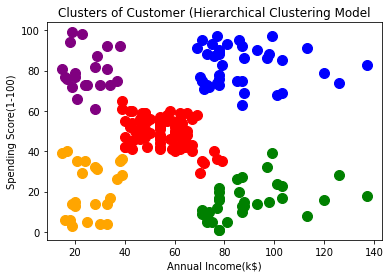

In [12]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,c='green', label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,c='red', label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,c='blue', label='Cluster 3')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=100,c='purple', label='Cluster 4')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=100,c='orange', label='Cluster 5')
plt.title('Clusters of Customer (Hierarchical Clustering Model')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

From this cluster we can infer that:
<br> Green: High Income vs Low Spending => careful
<br> Red: Normal Income vs Normal Spending => Standard
<br> Blue: High Income vs High Spending => Target
<br> Purple: Low Income vs High Spending => careless
<br> Orange: Low Income vs Low Spending => Sensible

#Text analysis using topic modelling

In [13]:
import pandas as pd
import os

In [39]:
papers  = pd.read_csv('/content/drive/MyDrive/Dataset/papers.csv')
#Uncomment the following lines if you are going to upload the file to Colab 
#from google.colab import files
#f = files.upload()
#papers  = pd.read_csv('papers.csv')

In [20]:
#papers = pd.read_csv('papers.csv')
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [21]:
#Cleaning
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
4367,2013,Bayesian optimization explains human active se...,Many real-world problems have complicated obje...,Bayesian optimization explains human active se...
58,1995,Family Discovery,Abstract Missing,Family Discovery\n\nStephen M. Omohundro\nNEC ...
1426,2002,Boosting Density Estimation,Abstract Missing,Boosting Density Estimation\n\nSaharon Rosset\...
416,1988,Modeling the Olfactory Bulb - Coupled Nonlinea...,Abstract Missing,402\n\nMODELING THE OLFACTORY BULB\n- COUPLED ...
5611,2016,On Mixtures of Markov Chains,We study the problem of reconstructing a mixtu...,On Mixtures of Markov Chains\nRishi Gupta?\nSt...


In [22]:
import re

#remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]','',x))


In [23]:
#convert to lower case and print first rows
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
papers['paper_text_processed'].head()

4367    bayesian optimization explains human active se...
58      family discovery\n\nstephen m omohundro\nnec r...
1426    boosting density estimation\n\nsaharon rosset\...
416     402\n\nmodeling the olfactory bulb\n- coupled ...
5611    on mixtures of markov chains\nrishi gupta\nsta...
Name: paper_text_processed, dtype: object

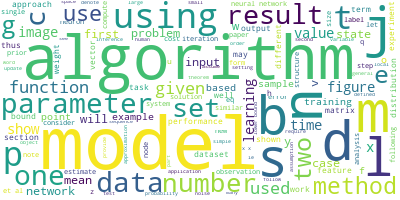

In [24]:
#Exploratory Analysis:
# To verify the preprocessing we use a word cloud 
from wordcloud import WordCloud
long_string = ','.join(list(papers['paper_text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [25]:
#Prepare text for LDA
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [26]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [27]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))


In [28]:
# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

['bayesian', 'optimization', 'explains', 'human', 'active', 'search', 'ali', 'borji', 'department', 'computer', 'science', 'usc', 'los', 'angeles', 'borji', 'uscedu', 'laurent', 'itti', 'departments', 'neuroscience', 'computer', 'science', 'usc', 'los', 'angeles', 'itti', 'uscedu', 'abstract', 'many', 'real']


In [29]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 3), (6, 3), (7, 8), (8, 1), (9, 3), (10, 1), (11, 1), (12, 3), (13, 31), (14, 1), (15, 11), (16, 1), (17, 1), (18, 2), (19, 1), (20, 2), (21, 1), (22, 2), (23, 1), (24, 3), (25, 2), (26, 8), (27, 1), (28, 1), (29, 4)]


In [30]:
#LDA Model Training
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"model" + 0.006*"data" + 0.005*"algorithm" + 0.005*"using" + '
  '0.005*"learning" + 0.004*"set" + 0.004*"models" + 0.004*"parameters" + '
  '0.004*"time" + 0.004*"neural"'),
 (1,
  '0.008*"model" + 0.007*"data" + 0.006*"learning" + 0.006*"algorithm" + '
  '0.004*"using" + 0.004*"training" + 0.003*"one" + 0.003*"set" + '
  '0.003*"parameters" + 0.003*"figure"'),
 (2,
  '0.008*"data" + 0.006*"model" + 0.005*"using" + 0.005*"set" + 0.004*"figure" '
  '+ 0.004*"time" + 0.003*"learning" + 0.003*"number" + 0.003*"algorithm" + '
  '0.003*"one"'),
 (3,
  '0.008*"data" + 0.005*"function" + 0.004*"one" + 0.004*"matrix" + '
  '0.004*"learning" + 0.004*"algorithm" + 0.004*"neural" + 0.003*"number" + '
  '0.003*"two" + 0.003*"set"'),
 (4,
  '0.006*"model" + 0.005*"learning" + 0.005*"data" + 0.004*"number" + '
  '0.004*"function" + 0.004*"algorithm" + 0.004*"two" + 0.004*"using" + '
  '0.003*"distribution" + 0.003*"state"'),
 (5,
  '0.008*"model" + 0.007*"algorithm" + 0.007*"data" + 0

Analyzing our LDA model
<br>
Now that we trained the model lets visualixe the topics for interpretablility
<br>
pyLDAvis which is designed to help interactively with:

a)Better understanding and interpreting individual topics, and
b)Better understanding the relationships between the topics.

In [31]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 3.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=2fca4be7835dd6c5243d024f0ed9d7e6e35143e1b6e955eb1b3f2737fd2e2209
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=ea253b749495c7f00c55370ba51fba5580d174a448b7e2f9be2cae884d051411
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [34]:
#import pyLDAvis.gensim
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [36]:
# Visualize the topics
#pyLDAvis.enable_notebook()

#LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
#/**
#if 1 == 1:
#    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#    with open(LDAvis_data_filepath, 'wb') as f:
#        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath, 'rb') as f:
#    LDAvis_prepared = pickle.load(f)

#pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
#LDAvis_prepared


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


FileNotFoundError: ignored